## PUI 2016 HOMEWORK 3, ASSIGNMENT 1
#### Ian Wright, iw453
#### September 2016

In [3]:
# required imports and initial settings
from scipy.optimize import curve_fit, minimize
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
%matplotlib inline

The list of 5 distributions I'll analyze for this exercise: 'normal', 'poisson', 'binomial', 'chi', 'triangular'

In [17]:
# set a global population mean & sd that will be the same across all distributions and samples
pop_mean = 500
pop_sd = 100

# dictionary to hold the various distributions and samples
# each dictionary value will be a list that contains 100 dictionaries
# ...each with a sample size, mean, and standard deviation
distro = {'Normal':[], 'Poisson':[], 'Binomial':[], 'Chi Squared':[], 'Triangular':[]}

# create an array of 100 different sample sizes between 10 and 2000 to use for ecah distribution
sample_sizes = np.linspace(10, 2000, 100).astype(int)

Here, I populate my 'distro' dictionary by sampling from each distribution type 100 types (variable sample sizes). Because each distribution has unique paramters, we need special syntax for each of the five distributions.

In [18]:
# NORMAL
for n in sample_sizes:
    # loc = center  ~ mean
    # scale = standard deviation
    sample = np.random.normal(loc=pop_mean, scale=pop_sd, size=n)
    sample_dict = {'size':n, 'mean':sample.mean(), 'sd':sample.std()}
    distro['Normal'].append(sample_dict)

In [19]:
# POISSON
for n in sample_sizes:
    # lam = lamda ~ expectation for interval ~ mean
    sample = np.random.poisson(lam=pop_mean, size=n)
    sample_dict = {'size':n, 'mean':sample.mean(), 'sd':sample.std()}
    distro['Poisson'].append(sample_dict)

In [20]:
# BINOMIAL
for n in sample_sizes:
    # n = number of events
    # p = probability of success --> @ 0.5 success, we expect 1000 events to have 500 successes (mean)
    sample = np.random.binomial(n=pop_mean*2, p=0.5, size=n)
    sample_dict = {'size':n, 'mean':sample.mean(), 'sd':sample.std()}
    distro['Binomial'].append(sample_dict)

In [21]:
# CHI SQUARED
for n in sample_sizes:
    # df = degrees of freedom ~ mean for this distribution
    sample = np.random.chisquare(df=pop_mean, size=n)
    sample_dict = {'size':n, 'mean':sample.mean(), 'sd':sample.std()}
    distro['Chi Squared'].append(sample_dict)

In [22]:
# TRIANGULAR
for n in sample_sizes:
    # left = left edge of triangle, use 0
    # mode = peak of distribution ~ mean
    # right = right edge of triangle, use 1000
    sample = np.random.triangular(left=0, mode=pop_mean, right = 1000, size=n)
    sample_dict = {'size':n, 'mean':sample.mean(), 'sd':sample.std()}
    distro['Triangular'].append(sample_dict)

### Plotting Sample Size vs. Mean

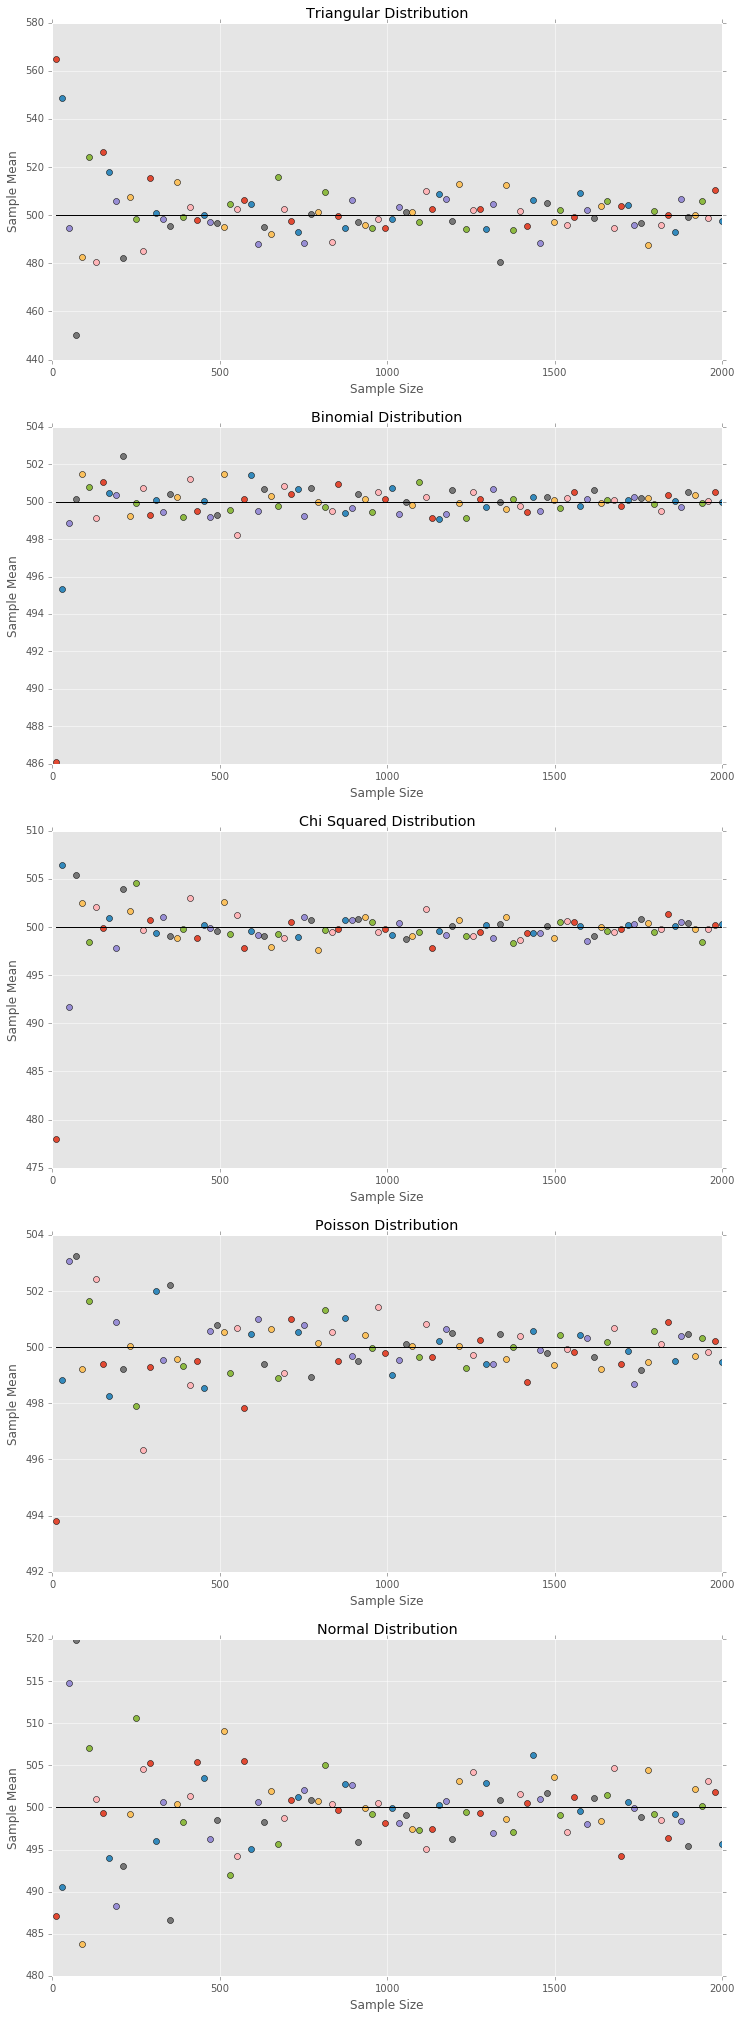

In [26]:
# create a figure with as many subplots as there are different distribution types
fig, axarr = plt.subplots(len(distro))
fig.set_size_inches(12,35)

# we will iterate through each distribution type to draw its own plot of size vs. mean
axis_position = 0
for dist_name, dist_data in distro.iteritems():
    
    # draw one point for each sample of size n
    for sample_dict in dist_data:
        axarr[axis_position].plot(sample_dict['size'], sample_dict['mean'], 'o')
    
    # include a reference line to represent the population mean
    axarr[axis_position].plot([min(sample_sizes), max(sample_sizes)], [pop_mean, pop_mean], 'k')
    axarr[axis_position].set_title(dist_name + ' Distribution')    
    axarr[axis_position].set_xlabel('Sample Size')
    axarr[axis_position].set_ylabel('Sample Mean')
    
    axis_position += 1  
plt.show()
    

#### FIGURE 1: Comparing sample mean against sample size, with respect to an underlying distribution mean=500, for five different random distributions

All of the plots in FIGURE 1 clearly show that as the random sample size grows, the mean of the random sample tends towards the mean of the underlying distribution from which the samples are drawn (regardless of distribution type).

It's interesting to note that both normal and triangular distributions have a far wider dispersion of sample means at small sample sizes than the other distributions. At n ~ 1000, all distribution samples closely model their underlying distributions.

### Histogram for ALL sample means

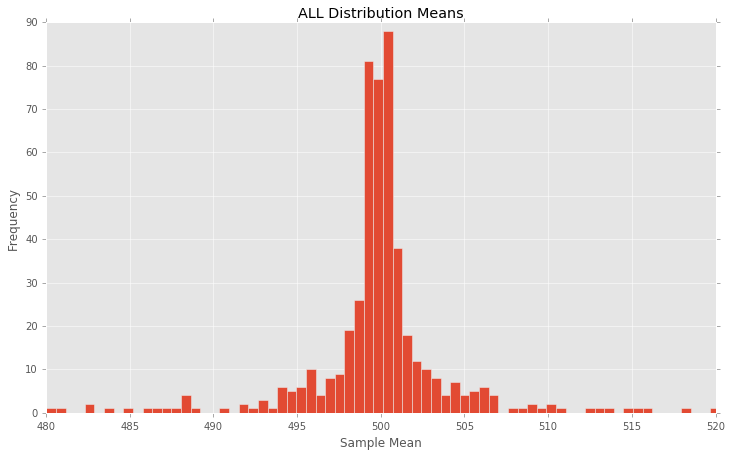

In [32]:
# create a figure with as many subplots as there are different distribution types
fig, ax = plt.subplots()
fig.set_size_inches(12,7)

# a master list to hold ALL sample means from ALL distributions
means = []

# iterate through each distribution type, and each sample, to pull out the means
for dist_name, dist_data in distro.iteritems():
    for sample_dict in dist_data:
        means.append(sample_dict['mean'])
    
# plot all means on a single histogram
# note that we set the x axis range explicitly to improve readability 
# - this excludes some outlying data points from the view
ax.hist(means, bins=200)
ax.set_xlim([480,520])
ax.set_title('ALL Distribution Means')    
ax.set_xlabel('Sample Mean')
ax.set_ylabel('Frequency')
    
plt.show()

#### FIGURE 2: Visualizing the sample means for ALL samples across five different underlying distribution types

FIGURE 2 visualizes the Central Limit Theorem nicely. The figure shows the sample means obtained from five completely different underlying distribution types, and at a wide range of sample sizes. However, because the mean value for each of these underlying distributions was constant (u=500), we see all of the sample means together forming a normal distribution around u=500. This is exactly the CLT at work.